# IST - 707 Data Analytics
**Saheb Singh** <br>
**Laxman Kumar** <br>
**Abhiraj Singh**

## Importing Libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pydotplus
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import math
import os
import plotly.graph_objects as go
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## Loading the data

In [2]:
df = pd.read_csv('data.csv')
#df = pd.read_csv('CleanedMerged.csv')

In [69]:
#df.head()

## Data Cleaning

### Getting the number of rows and columns in the data

In [4]:
df.shape

(5144, 145)

There are 5144 numbers of rows. And each row has 145 number of columns. 

#### Selecting Relevant Columns

We looked at our dataset and our data description, and looked at the relevant columns. Therefore we would only select those columns which are relevant. 

In [5]:
a = ['date', 'B_fighter', 'R_fighter', 'Winner', 'B_current_lose_streak',
       'B_current_win_streak', 'B_draw', 'B_longest_win_streak', 'B_losses',
       'B_total_rounds_fought', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak',
       'R_current_win_streak', 'R_draw', 'R_longest_win_streak', 'R_losses',
       'R_total_rounds_fought', 'R_total_title_bouts',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age']

In [6]:
df = df[a]

#### Shape of the new Dataframe

In [7]:
df.shape

(5144, 42)

#### Fixing the datetime in the dataframe

In [8]:
df['date'] = pd.to_datetime(df['date'])

## Data Preprocessing 

#### Replacing empty string with nan

In [9]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.fillna(np.nan)

#### Renaming some of our columns

In [10]:
df.rename(columns={"B_win_by_KO/TKO": "B_win_by_KO_TKO", "R_win_by_KO/TKO": "R_win_by_KO_TKO"},inplace=True)

In [11]:
# Getting the list of target variables
df.Winner.unique()

array(['Red', 'Blue', 'Draw'], dtype=object)

#### Removing Draws 
As this is a binary classification. We are only taking Winner and Looser, therefore we are removing all the rows where the result is Draw. 

In [12]:
df = df[df.Winner != 'Draw']

### Viewing basic statistics about the data

In [13]:
df.describe()

,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,...,R_win_by_Decision_Unanimous,R_win_by_KO_TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5061.000000,5061.000000,5061.0,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,...,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5057.000000,4752.000000,5058.000000,4891.000000,4998.000000
mean,0.429955,0.833235,0.0,1.585062,1.462754,8.903972,0.277811,0.016993,0.211421,0.778502,...,1.178423,1.254100,0.778502,0.071725,3.600869,179.293763,183.682837,172.075326,29.175833,29.427371
std,0.730263,1.284542,0.0,1.771906,1.865975,11.242031,1.107056,0.130777,0.525210,1.294768,...,1.602733,1.792344,1.327774,0.278677,3.708439,8.651769,10.309217,35.168220,4.078995,4.140642
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,26.000000
50%,0.000000,0.000000,0.0,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,180.340000,185.420000,170.000000,29.000000,29.000000
75%,1.000000,1.000000,0.0,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,6.000000,12.000000,0.0,16.000000,13.000000,75.000000,16.000000,2.000000,5.000000,10.000000,...,10.000000,11.000000,13.000000,2.000000,20.000000,210.820000,213.360000,345.000000,51.000000,47.000000


### Removing Constant columns
Constant columns have no variation and therefore does not contribute to our dataset

In [14]:
# Distinguishing between  categorical and numeric columns

categorical = list(df.select_dtypes(include=['object']))
numeric = df.columns.tolist()
constants = []
for c in categorical:
    numeric.remove(c)
for col in numeric:
    if min(df[col]) == max(df[col]):
        constants.append(col)
if len(constants)>0: 
    df.drop(columns = constants, axis=1, inplace=True)

#### Get count of na and null in each column

In [67]:
#### Get count of na and null in each column
#df.isna().sum()

### Cleaning the dataframe

In [16]:
# Dropping NA values in stance
df.dropna(subset = ['R_Stance', 'B_Stance'], inplace = True, axis = 0)

#### Replacing the nan of height with its median

In [17]:
df["B_Height_cms"] = df["B_Height_cms"].fillna(value=df["B_Height_cms"].median())
df["R_Height_cms"] = df["R_Height_cms"].fillna(value=df["R_Height_cms"].median())
df["B_Reach_cms"] = df["B_Reach_cms"].fillna(value=df["B_Reach_cms"].median())
df["R_Reach_cms"] = df["R_Reach_cms"].fillna(value=df["R_Reach_cms"].median())

#### Dropping the missing values

In [18]:
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [68]:
#df.columns.values.tolist()

In [20]:
df.shape

(4635, 40)

### One hot encoding 

Before encoding Winner(target variabel) we are encoding R Stance and B Stance. This will help us with binary classification later on.

In [21]:
# Selecting columns to be encoded
toBeEncoded = ['B_Stance','R_Stance']
df_encoded = df[toBeEncoded]

# Encoding the data
df_encoded = pd.get_dummies(df_encoded)

# Renaming the encoding columns
df_encoded.rename(columns={
    "B_Stance_Open Stance": "B_Stance_Open_Stance",
    "R_Stance_Open Stance": "R_Stance_Open_Stance"},inplace=True)

# Droping the initial uncoded fields
df.drop(toBeEncoded, axis=1, inplace=True) 

# Concatenating the encoded dataframe at the end
df = pd.concat([df,df_encoded],1)
#df.head(3)

### Encoding Blue = 1 and Red = 0
**Since this is a binary classification we are replacing Blue with value 1 and Red with value 0. 1 means that the winner of the fight was the B_fighter.**

In [22]:
df['Winner'] = df['Winner'].replace(['Blue', 'Red'], [1, 0]).values

In [23]:
# Shuffling the data
df_processed = df.sample(frac=1, random_state=110).reset_index(drop=True)

### Training and Testing Dataset

In [24]:
X = df_processed.drop(columns=['Winner', 'date', 'B_fighter', 'R_fighter']).copy()
y = df_processed['Winner']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)
print(x_train.shape)
print(x_test.shape)

(3708, 43)
(927, 43)


# Machine Learning Models

## Random Forest

**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of all the output of the decision trees.**

In [25]:
# Initialising Random Forest 
rf = RandomForestClassifier()

### Optimising Random Forest By Tuning Hyperparameters

**n_estimators = number of trees in the foreset<br>
max_features = max number of features considered for splitting a node<br>
max_depth = max number of levels in each decision tree<br>
min_samples_split = min number of data points placed in a node before the node is split<br>
min_samples_leaf = min number of data points allowed in a leaf node<br>
bootstrap = method for sampling data points (with or without replacement)**

In [26]:
param_grid = {'n_estimators': [100, 200, 400],
               'max_features': ['sqrt', 'auto'],
               'max_depth': [10, 20, 30],
               'min_samples_split': [3, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

grid_rf = GridSearchCV(rf, param_grid, cv=3, verbose=0, scoring='accuracy')

In [27]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

### Model Evaluation using Training Data

In [28]:
pred_rf_pipeline = grid_rf.predict(x_test) 
print(classification_report(y_test, pred_rf_pipeline))
print("AUC: ",roc_auc_score(y_test, pred_rf_pipeline))
print("Accuracy Score: ",accuracy_score(y_test, pred_rf_pipeline))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       644
           1       0.53      0.11      0.18       283

    accuracy                           0.70       927
   macro avg       0.62      0.53      0.50       927
weighted avg       0.66      0.70      0.62       927

AUC:  0.5338075851019467
Accuracy Score:  0.6990291262135923


After tuning the hyperparameter we get an accuraacy of 0.7 and recall of 0.96 for Random Forest. 

##  SVM

**Support Vector Machine (SVM) is a widely-used supervised machine learning algorithm. It is mostly used in classification tasks but suitable for regression tasks as well.**

In [29]:
# Initialising SVM Forest 
lin_svm = svm.LinearSVC()

### Optimising SVM By Tuning Hyperparameters

**C parameter adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. If c is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin.**

In [30]:
param_grid = {'C':[0.001,0.01,0.1,1.0,10,100,1000],'penalty':['l2','l1']}
grid_svm = GridSearchCV(lin_svm, param_grid, cv=3, verbose=0, scoring='accuracy')

In [31]:
grid_svm.fit(x_train, y_train)

/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to conver

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='accuracy')

### Model Evaluation using Training Data

In [32]:
#Predicting using Pipeline
pred_lin_pipeline = grid_svm.predict(x_test) 
print(classification_report(y_test, pred_lin_pipeline))
print("AUC: ",roc_auc_score(y_test, pred_lin_pipeline))
print("Accuracy Score: ",accuracy_score(y_test, pred_lin_pipeline))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       644
           1       0.57      0.12      0.19       283

    accuracy                           0.70       927
   macro avg       0.64      0.54      0.51       927
weighted avg       0.67      0.70      0.63       927

AUC:  0.5388939490375962
Accuracy Score:  0.703344120819849


We get accuracy of 0.7 and recall of 0.96 which is similar to that of Random Forest. 

## Gradient Boosting Classifier

**Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.  A sincere understanding of GBM here should give you much needed confidence to deal with such critical issues.**

In [33]:
# Initialising Gradiet Boosting Classifier 
xgbClf = XGBClassifier()

### Optimising Gradient Boosting By Tuning Hyperparameters

**min_samples_split: Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.<br>
min_samples_leaf: Defines the minimum samples (or observations) required in a terminal node or leaf.Used to control over-fitting similar to min_samples_split.Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.<br>
min_weight_fraction_leaf: Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer. <br>
max_depth: The maximum depth of a tree.Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.<br>
max_leaf_nodes: The maximum number of terminal nodes or leaves in a tree.**

In [34]:
param_grid = {'learning_rate':[0.15,0.1,0.05,0.005,0.001], 
              'n_estimators':[100,250,500,750,1000],
              'max_depth':[2,3,4,5,6,7],
              'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5, 2, 5]}

grid_xgb = GridSearchCV(xgbClf, param_grid, cv=3, verbose=0, scoring='accuracy')

In [70]:
#grid_xgb.fit(x_train, y_train)

### Model Evaluation using Training Data

In [36]:
pred_xgb_pipeline = grid_xgb.predict(x_test) 
print(classification_report(y_test, pred_xgb_pipeline))
print("AUC: ",roc_auc_score(y_test, pred_xgb_pipeline))
print("Accuracy Score: ",accuracy_score(y_test, pred_xgb_pipeline))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       644
           1       0.58      0.14      0.23       283

    accuracy                           0.71       927
   macro avg       0.65      0.55      0.53       927
weighted avg       0.67      0.71      0.64       927

AUC:  0.5491462370783311
Accuracy Score:  0.7065803667745415


We get accuracy of 0.71, recall of 0.95 and AUC od 0.54.

## Extra Tree Classifier

**Extremely Randomized Trees, or Extra Trees for short, is an ensemble machine learning algorithm.
Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest.
The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.**

In [37]:
# Initialising Extra Tree Classifier 
et = ExtraTreesClassifier()

### Optimising Extra Tree By Tuning Hyperparameters

**n_estimator:The number of trees in the forest.<br>
max_features: The number of features to consider when looking for the best split.<br>
max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br>
min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.<br> 
bootstrapbool: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.**

In [38]:
param_grid = {'n_estimators': [100, 200, 400],
               'max_features': ['sqrt', 'auto'],
               'max_depth': [10, 20, 30],
               'min_samples_split': [3, 5, 10],
               'bootstrap': [True, False]}

grid_et = GridSearchCV(et, param_grid, cv=3, verbose=0, scoring='accuracy')

In [39]:
grid_et.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

### Model Evaluation using Training Data

In [40]:
pred_et_pipeline = grid_et.predict(x_test) 
print(classification_report(y_test, pred_et_pipeline))
print("AUC: ",roc_auc_score(y_test, pred_et_pipeline))
print("Accuracy Score: ",accuracy_score(y_test, pred_et_pipeline))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       644
           1       0.54      0.13      0.22       283

    accuracy                           0.70       927
   macro avg       0.63      0.54      0.52       927
weighted avg       0.66      0.70      0.63       927

AUC:  0.5422930886903847
Accuracy Score:  0.7011866235167206


We get an accuracy of 0.70, recall of 0.95 and AUC of 0.54.

## Naïve Bayes Classification

**In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with Kernel density estimation, they can achieve higher accuracy levels.<br>
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).**

In [41]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
mnb = MultinomialNB(alpha=1.0)

### Optimising Naïve Bayes Classification By Tuning Hyperparameters

**alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).**

In [42]:
param_grid = {
    'alpha' : [0.5,1.0,2]
}
grid_mnb = GridSearchCV(mnb, param_grid, cv=3, verbose=0, scoring='accuracy')

In [43]:
grid_mnb.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 1.0, 2]}, scoring='accuracy')

### Model Evaluation using Training Data

In [44]:
pred_mnb_pipeline = grid_mnb.predict(x_test) 
print(classification_report(y_test, pred_mnb_pipeline))
print("AUC: ",roc_auc_score(y_test, pred_mnb_pipeline))
print("Accuracy Score: ",accuracy_score(y_test, pred_mnb_pipeline))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       644
           1       0.40      0.46      0.43       283

    accuracy                           0.63       927
   macro avg       0.57      0.58      0.58       927
weighted avg       0.64      0.63      0.63       927

AUC:  0.5796232688804513
Accuracy Score:  0.627831715210356


We get a lower accuracy of 0.63, recall of 0.70 and AUC of 0.57.

## Deep Neural Network 

**A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.**

### Scaling data for Neural Network

In [71]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

### Implementing Neural Network 

**Dropout is regularization technique to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.**

In [72]:
# Modeling
dnnClf = Sequential()

# First hiden layer
dnnClf.add(Dense(units=20,activation='relu'))
# Second hiden layer
dnnClf.add(Dense(units=10, activation='relu'))
# Adding Dropout
dnnClf.add(Dropout(0.5))
# Output layer
dnnClf.add(Dense(units=1, activation='sigmoid'))

dnnClf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=16)

### Training Neural Netowork

In [73]:
dnnClf.fit(x=X_train_scaled, 
          y=y_train, 
          epochs=1000,
          validation_data=(X_test_scaled, y_test), verbose=1,
          callbacks=[early_stop]
          )
model_loss = pd.DataFrame(dnnClf.history.history)

Epoch 1/1000
116/116 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.5359 - val_loss: 0.6520 - val_accuracy: 0.6926
Epoch 2/1000
116/116 [==============================] - 0s 859us/step - loss: 0.6515 - accuracy: 0.6691 - val_loss: 0.6258 - val_accuracy: 0.6947
Epoch 3/1000
116/116 [==============================] - 0s 854us/step - loss: 0.6437 - accuracy: 0.6739 - val_loss: 0.6197 - val_accuracy: 0.6947
Epoch 4/1000
116/116 [==============================] - 0s 870us/step - loss: 0.6334 - accuracy: 0.6742 - val_loss: 0.6148 - val_accuracy: 0.6947
Epoch 5/1000
116/116 [==============================] - 0s 834us/step - loss: 0.6357 - accuracy: 0.6739 - val_loss: 0.6149 - val_accuracy: 0.6947
Epoch 6/1000
116/116 [==============================] - 0s 852us/step - loss: 0.6296 - accuracy: 0.6745 - val_loss: 0.6091 - val_accuracy: 0.6936
Epoch 7/1000
116/116 [==============================] - 0s 862us/step - loss: 0.6274 - accuracy: 0.6777 - val_loss: 0.6057 - v

Epoch 57/1000
116/116 [==============================] - 0s 901us/step - loss: 0.5819 - accuracy: 0.7033 - val_loss: 0.5715 - val_accuracy: 0.7163
Epoch 58/1000
116/116 [==============================] - 0s 859us/step - loss: 0.5826 - accuracy: 0.6953 - val_loss: 0.5727 - val_accuracy: 0.7098
Epoch 59/1000
116/116 [==============================] - 0s 886us/step - loss: 0.5790 - accuracy: 0.7017 - val_loss: 0.5721 - val_accuracy: 0.7131
Epoch 60/1000
116/116 [==============================] - 0s 901us/step - loss: 0.5786 - accuracy: 0.6998 - val_loss: 0.5731 - val_accuracy: 0.7109
Epoch 61/1000
116/116 [==============================] - 0s 854us/step - loss: 0.5840 - accuracy: 0.6971 - val_loss: 0.5740 - val_accuracy: 0.7120
Epoch 62/1000
116/116 [==============================] - 0s 867us/step - loss: 0.5767 - accuracy: 0.7044 - val_loss: 0.5714 - val_accuracy: 0.7098
Epoch 63/1000
116/116 [==============================] - 0s 868us/step - loss: 0.5792 - accuracy: 0.6993 - val_loss: 0

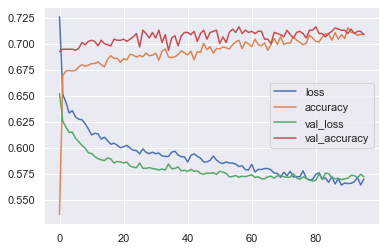

In [74]:
model_loss.plot()
plt.show()

### Model Evaluation using Training Data

In [75]:
dnnPreds = dnnClf.predict(scaler.transform(x_test))
dnnPreds = [round(i[0]) for i in dnnPreds]
print(classification_report(y_test, dnnPreds))
print("AUC: ",roc_auc_score(y_test, dnnPreds))
print("Accuracy Score: ",accuracy_score(y_test,dnnPreds))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       644
           1       0.58      0.17      0.27       283

    accuracy                           0.71       927
   macro avg       0.65      0.56      0.54       927
weighted avg       0.68      0.71      0.65       927

AUC:  0.5586221276035379
Accuracy Score:  0.7087378640776699


We get an accuracy of 0.71, recall of 0.94 and AUC of 0.56.

## Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).**

In [51]:
# Initialising Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### Optimising Logistic Regression by Tuning Hyperparameters

**Binary Logistic Regression.<br>
C: The C parameter controls the penality strength, which can also be effective.<br>
max_iter: Number of iteration.**


In [52]:
param_grid = {
    'max_iter': [100,200,400],
    'C':[0.01,0.001,0.1,1]
}
grid_lr = GridSearchCV(lr, param_grid, cv=3, verbose=0, scoring='accuracy')

In [54]:
grid_lr.fit(x_train, y_train)

/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.001, 0.1, 1],
                         'max_iter': [100, 200, 400]},
             scoring='accuracy')

### Model Evaluation using Training Data

In [55]:
pred_lr_pipeline = grid_lr.predict(x_test) 
print(classification_report(y_test, pred_lr_pipeline))
print("AUC: ",roc_auc_score(y_test, pred_lr_pipeline))
print("Accuracy Score: ",accuracy_score(y_test, pred_lr_pipeline))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       644
           1       0.46      0.17      0.25       283

    accuracy                           0.69       927
   macro avg       0.59      0.54      0.52       927
weighted avg       0.64      0.69      0.63       927

AUC:  0.5405509953251542
Accuracy Score:  0.6850053937432579


We get an accuracy of 0.69, recall of 0.91 and AUC of 0.54.

## K Means Classification

**k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.**

In [56]:
# Initialising KMeans classification
kmeans = KMeans()

### Optimising K-Means 
**Applying KMeans mode with 2 clusters as our model should perform Binary Classification. Parameters: n_init means the number of time the algorithm will run with different centroids, max_iter means the maximum number of iteration Kmeans will perform.**

In [57]:
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)

In [58]:
kmeans.fit(x_train)

KMeans(max_iter=100, n_clusters=2, n_init=25, random_state=6)

### Model Evaluation using Training Data

In [59]:
pred_kmeans = kmeans.predict(x_test)
print(classification_report(y_test, pred_kmeans))
print("AUC: ",roc_auc_score(y_test, pred_kmeans))
print("Accuracy Score: ",accuracy_score(y_test, pred_kmeans))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       644
           1       0.25      0.26      0.25       283

    accuracy                           0.53       927
   macro avg       0.46      0.46      0.46       927
weighted avg       0.54      0.53      0.54       927

AUC:  0.4560526084761759
Accuracy Score:  0.5318230852211435


We get the lowest accuracy while using K Means with accuracy of 0.53 and recall of 0.65 where as we AUC score is 0.45. 

## Association Rule Mining

### Converting Age into categorical data.

In [60]:
t = df.describe()
column_name = t.columns

In [61]:
for i in column_name:
    df[i+"grp"] = pd.qcut(df[i], q=4,
                                  labels = False,duplicates='drop')

In [62]:
t = ['B_current_lose_streak', 'B_current_win_streak',
       'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought',
       'B_total_title_bouts', 'B_win_by_Decision_Majority',
       'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous',
       'B_win_by_KO_TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'R_current_lose_streak', 'R_current_win_streak',
       'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO_TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'B_age', 'R_age', 'B_Stance_Open_Stance',
       'B_Stance_Orthodox', 'B_Stance_Sideways', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'R_Stance_Open_Stance', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_Stance_Switch']
l = []
for i in t:
    l.append(i+'grp')
l.append('Winner')
not_used_columns = list(set(df.columns.to_list()) - set(l))
df = pd.get_dummies(df, columns=l)
df.drop(labels=not_used_columns, axis=1, inplace=True)

### Appriori with Tuned Parameters

#### Applying Apriori with for Winner = 1

In [66]:
#df

In [64]:
#Apriori min support
min_support = 0.02 # Since the number of Attrition = Yes is so less, min_support also needs to be small 

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Winner_1\'}'

results_attrition_yes = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_yes.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11268998,"(R_total_title_boutsgrp_0, R_agegrp_3, B_Reach...",(Winner_1),0.042934,0.322114,0.023085,0.537688,1.669247,0.009256,1.466296
13417564,"(R_total_title_boutsgrp_0, R_agegrp_3, R_Heigh...",(Winner_1),0.039914,0.322114,0.021359,0.535135,1.661320,0.008502,1.458242
10657102,"(R_agegrp_3, B_Reach_cmsgrp_0, B_Height_cmsgrp_0)",(Winner_1),0.038188,0.322114,0.020280,0.531073,1.648711,0.007980,1.445612
13872624,"(R_win_by_Submissiongrp_0, R_Reach_cmsgrp_0, R...",(Winner_1),0.043581,0.322114,0.022869,0.524752,1.629088,0.008831,1.426384
2436160,"(B_current_win_streakgrp_1, R_lossesgrp_2, R_t...",(Winner_1),0.043366,0.322114,0.022654,0.522388,1.621747,0.008685,1.419323


After looking at the top 5 rules we can see that fighters who are the defending the title, are of a old age typically more than 33 years, have a good reach, and have a good height are most likely to win the match. Therefore fighter's title, age group and height are important factors while determining if the fighter will win the fight or not. 

####  Applying Apriori with for Winner = 0

In [65]:
#Apriori min support
min_support = 0.2 

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
#frequent_items = ap.apriori(df, min_support=0.8, min_confidence=0.8,
#                              min_lift=1,min_length=2)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Winner_0\'}'

results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_no.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1080543,"(R_agegrp_0, R_current_lose_streakgrp_0, B_win...",(Winner_0),0.265156,0.677886,0.205609,0.775427,1.143891,0.025864,1.434343
1457416,"(R_win_by_Submissiongrp_0, R_agegrp_0, R_curre...",(Winner_0),0.268177,0.677886,0.207120,0.772325,1.139315,0.025326,1.414799
70036,"(B_Reach_cmsgrp_1, R_Stance_Switchgrp_0)",(Winner_0),0.277023,0.677886,0.213161,0.769470,1.135104,0.025371,1.397280
1398504,"(B_Reach_cmsgrp_1, R_win_by_Decision_Splitgrp_...",(Winner_0),0.277023,0.677886,0.213161,0.769470,1.135104,0.025371,1.397280
1401990,"(B_Reach_cmsgrp_1, B_Stance_Orthodoxgrp_0, B_S...",(Winner_0),0.277023,0.677886,0.213161,0.769470,1.135104,0.025371,1.397280


After looking at the top 5 rules we can see that fighters who are young belonging to age group 0, have a good winning streak, and have a lose streak of 0 are most likely to loose the match. Therefore fighter's age group, winning or loosing streakare important factors while determining if the fighter will win the fight or not. 

## Conclusion

**Looking at all our model's accuracy we see that we get the highest accuracy of 0.71 using Neural Network and Random Forest. With the lowest accuracy being 0.53 which we got using K Means. Since the UFC's model is able to predict the winner correctly only 57% of the time. We have increased the accuracy using our machine learning model to 71%.** 